#DATA MINING SPRING 2019

This notebook was developed as part of the "Data Mining" course project at the Department of Informatics of the University of Athens during the spring semester of 2019.  

##Imports and data prep

Basic library imports for data handling, preprocessing and text analytics

In [2]:
import nltk #used for text preprocessing
nltk.download('punkt') #downloading punkt corpus used for preprocessing 
import pandas as pd #used for data manipulation
import numpy as np
import re  #used during preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

import sys
import csv
csv.field_size_limit(sys.maxsize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


131072

Importing data file and creating a pandas dataframe that can be used for statistical analysis on data.

In [0]:
#Importing tsv data file into a pandas dataframe and adding names for each column

trainSet = 'https://raw.githubusercontent.com/al3xlapo/dataMining/master/train2017.tsv'
testSet = 'https://raw.githubusercontent.com/al3xlapo/dataMining/master/test2017.tsv'
evalSet = 'https://raw.githubusercontent.com/al3xlapo/dataMining/master/SemEval2017_task4_subtaskA_test_english_gold.txt'


train_df = pd.read_csv('https://raw.githubusercontent.com/al3xlapo/dataMining/master/train2017.tsv',delimiter='\t',names = ["Sequence", "Start", "Sentiment", "Text"])
test_df = pd.read_csv('https://raw.githubusercontent.com/al3xlapo/dataMining/master/test2017.tsv',delimiter='\t',names = ["Sequence", "Start", "Sentiment", "Text"])
evalDataset = pd.read_csv(evalSet, delimiter='\t',names = ["Id", "Sentiment"])


#creating a new dataframe using only the text of each tweet and its anotations
test_data = test_df[["Sentiment","Text"]]
train_data = train_df[["Sentiment","Text"]]




Using the pandas dataframe to extract metrics on the raw data before preprocessing as part of text analysis. These metrics are the  number of words of each tweet, number of charachters in each tweet, average word length, number of stopwords in each tweet, number of hashtags 

In [4]:
train_data['Word_count'] = train_data["Text"].apply(lambda x: len(str(x.split(" "))))
train_data['Char_count'] = train_data["Text"].apply(lambda x: len(x))
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train_data["avg_word_count"] =  train_data["Text"].apply(lambda x: avg_word(x))
train_data["stopwords"] = train_data["Text"].apply(lambda x: len([x for x in x.split() if x in stop]))
train_data["hashtags"] = train_data["Text"].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train_data[["Text","Word_count","Char_count","avg_word_count","stopwords","hashtags"]].head()


test_data['Word_count'] = test_data["Text"].apply(lambda x: len(str(x.split(" "))))
test_data['Char_count'] = test_data["Text"].apply(lambda x: len(x))
test_data["avg_word_count"] =  test_data["Text"].apply(lambda x: avg_word(x))
test_data["stopwords"] = test_data["Text"].apply(lambda x: len([x for x in x.split() if x in stop]))
test_data["hashtags"] = test_data["Text"].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
test_data[["Text","Word_count","Char_count","avg_word_count","stopwords","hashtags"]].head()

print("Metrics of training data")

print(train_data.mean(axis = 0))

print("Metrics of testing data")
print(test_data.mean(axis = 0))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Metrics of training data
Word_count        169.372094
Char_count        110.666893
avg_word_count      4.448852
stopwords           5.822484
hashtags            0.233064
dtype: float64
Metrics of testing data
Word_count        141.137415
Char_count         94.892787
avg_word_count      5.235591
stopwords           3.977369
hashtags            0.848746
dtype: float64


Preprcessing the data.


In [0]:
#character level preprocessing

train_data["Text"] = train_data["Text"].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
train_data["Text"] = train_data["Text"].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
train_data["Text"] =  train_data["Text"].str.replace('[^\w\s]','')
train_data["Text"] =  train_data["Text"].str.replace('[0-9]+','')
train_data["Text"] = train_data["Text"].str.lower()

test_data["Text"] = test_data["Text"].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
test_data["Text"] = test_data["Text"].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
test_data["Text"] =  test_data["Text"].str.replace('[^\w\s]','')
test_data["Text"] =  test_data["Text"].str.replace('[0-9]+','')
test_data["Text"] = test_data["Text"].str.lower()

In [0]:
#tokenizing text using nltk. Adding a new column to our pandas df that includes
#tokenized text
from nltk import word_tokenize

train_data["Tokens"] = train_data["Text"].apply( nltk.word_tokenize)
test_data["Tokens"] = test_data["Text"].apply( nltk.word_tokenize)

In [0]:

train_data["Text_stop"] = train_data["Tokens"].apply(lambda x: [item for item in x if item not in stop])
test_data["Text_stop"] = test_data["Tokens"].apply(lambda x: [item for item in x if item not in stop])

In [0]:
#lancaster semming
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()
train_data["Stemmed"] = train_data["Text_stop"].apply(lambda x: [lancaster.stem(item) for item in x ])
test_data["Stemmed"] = test_data["Text_stop"].apply(lambda x: [lancaster.stem(item) for item in x ])

Corpus analysis. In this part we try to extract metrics from then corpus and compare tweets based on annotation. To achieve this we firstly devide our corpus into three smaller corpora of positive, negative and neutral tweets respectively.

In [0]:
train_data_positive = train_data[train_data["Sentiment"]=="positive"]
train_data_negative = train_data[train_data["Sentiment"]=="negative"]
train_data_neutral = train_data[train_data["Sentiment"]=="neutral"]

In [0]:
corpus_whole = []

for row in train_data["Text_stop"]:
    corpus_whole.append(row)
    

corpus_positive = []

for row in train_data_positive["Text_stop"]:
    corpus_positive.append(row)
    

corpus_negative = []

for row in train_data_negative["Text_stop"]:
    corpus_negative.append(row)
    
corpus_neutral = []

for row in train_data_neutral["Text_stop"]:
    corpus_neutral.append(row)


In [0]:

flatlist_whole = []
for sublist in corpus_whole:
   for item in sublist:
      flatlist_whole.append(item)



flatlist_positive = []
for sublist in corpus_positive:
   for item in sublist:
      flatlist_positive.append(item)


flatlist_negative = []
for sublist in corpus_negative:
   for item in sublist:
      flatlist_negative.append(item)


flatlist_neutral = []
for sublist in corpus_neutral:
   for item in sublist:
      flatlist_neutral.append(item)

      

Removing rare and very common words

In [12]:
from collections import Counter
count = Counter(flatlist_whole)
common_words_tuple = count.most_common(10)
n=30
rare_words_tuple = count.most_common()[:-n-1:-1]

common_words = []
rare_words = []
for entry in common_words_tuple:
  word, occurances = entry
  common_words.append(word)

for entry in rare_words_tuple:
  word, occurances = entry
  rare_words.append(word)


print(common_words)
print(rare_words)
train_data["Text_stop"] = train_data["Tokens"].apply(lambda x: [item for item in x if item not in common_words])
train_data["Text_stop"] = train_data["Tokens"].apply(lambda x: [item for item in x if item not in rare_words])
test_data["Text_stop"] = test_data["Tokens"].apply(lambda x: [item for item in x if item not in common_words])
test_data["Text_stop"] = test_data["Tokens"].apply(lambda x: [item for item in x if item not in rare_words])

['tomorrow', 'th', 'may', 'day', 'going', 'night', 'st', 'see', 'im', 'time']
['outstandi', 'georgeisediting', 'abilityi', 'mosaics', 'sarbeco', 'ballhogba', 'patriciacross', 'chessing', 'gigem', 'boyband', 'gar', 'gracey_', 'moguls', 'junk', 'sicc', 'berekum', 'sice', 'dyngus', 'boou', 'boos', 'jen_bennings', 'kmaiadanyelleshe', 'robertalai', 'aliciamenendez', 'chaisson', 'airsoft', 'fiddlers', 'bryanfuller', 'nflhe', 'zolex']


In [0]:
corpus_final = ', '.join(flatlist_whole)
corpus_final_positive = ', '.join(flatlist_positive)
corpus_final_negative = ', '.join(flatlist_negative)
corpus_final_neutral = ', '.join(flatlist_neutral)

In [0]:
from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(corpus_final)

wordcloud_positive = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(corpus_final_positive)

wordcloud_negative = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(corpus_final_negative)

wordcloud_neutral = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(corpus_final_neutral)




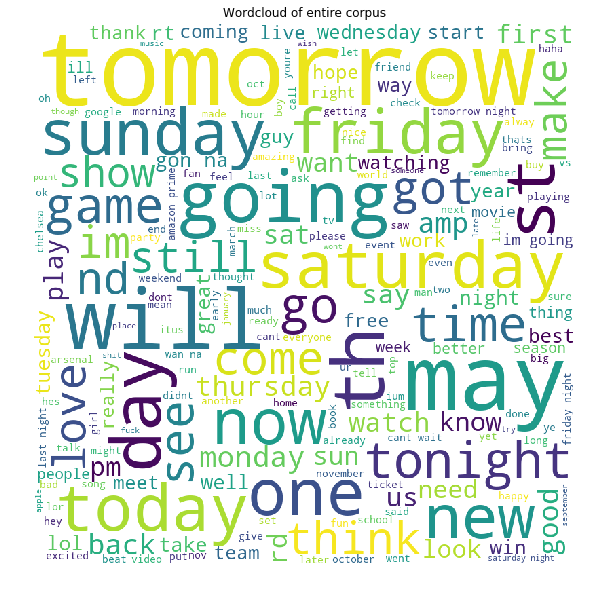

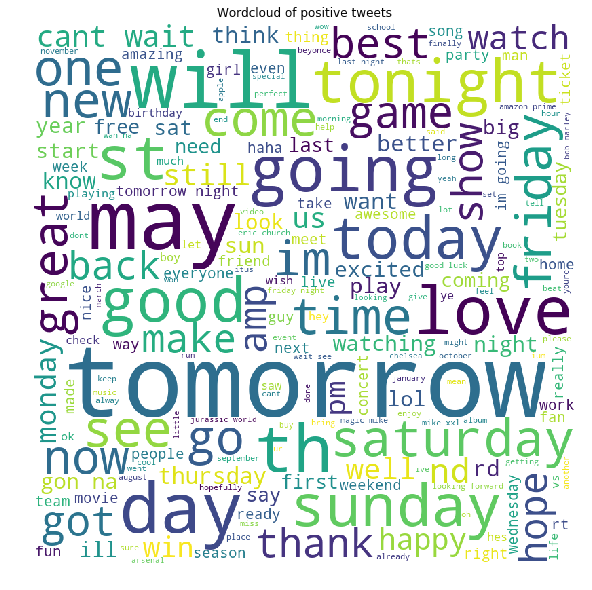

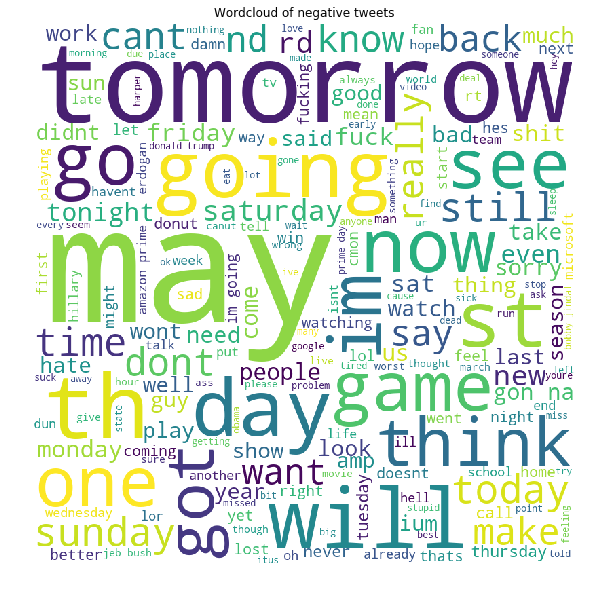

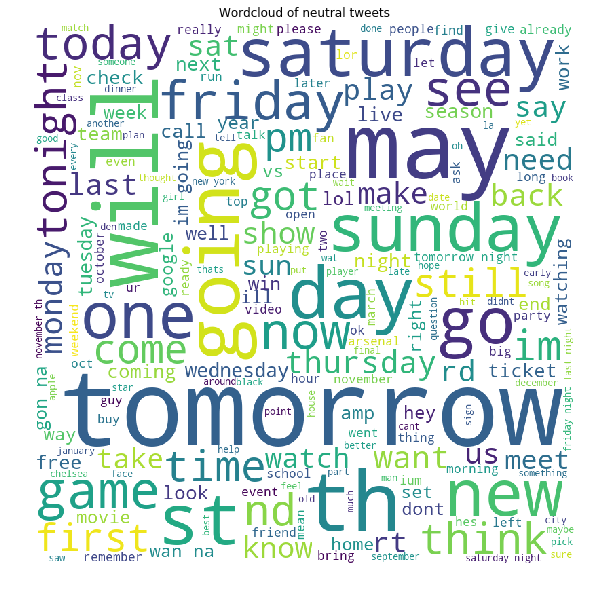

In [28]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('Wordcloud of entire corpus')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_positive) 
plt.title('Wordcloud of positive tweets')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_negative) 
plt.title('Wordcloud of negative tweets')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_neutral) 
plt.title('Wordcloud of neutral tweets')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 


In [0]:
#export training and testing data sets


export_train_set= train_data[["Text_stop","Stemmed","Sentiment"]]
export_test_set= test_data[["Text_stop","Stemmed","Sentiment"]]

export_train_set.to_csv('clean_set_train.csv')
export_test_set.to_csv('clean_set_test.csv')

# **Vectorization**

In [0]:
#CORPUS CREATION

#create a corpus(or list) of all the cleared tweets

TWEETS  = [];

for row in train_data["Text"]:
    TWEETS.append(row)
    

#create a corpus of all the cleared tokens
tokenizedTweets = [];

for row in train_data["Stemmed"]:
    tokenizedTweets.append(row)
    
#same for testData

testTWEETS  = [];

for row in test_data["Text"]:
    testTWEETS.append(row)
    

#create a corpus of all the cleared tokens
testTokenizedTweets = [];

for row in test_data["Stemmed"]:
    testTokenizedTweets.append(row)


    

# Bag of words vectorization

In [30]:
#bag of words vectorization

#for trainset

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
trainBow = bow_vectorizer.fit_transform(TWEETS)  #TWEETS : a list with the actual tweets 


print(bow_vectorizer.get_feature_names())

print(trainBow.shape)  #the output is a numpy array of features. 
#The dimensionality of this array depends on the number of TWEETS (shape should be number_of_tweets x vocabulary_size)


#for testset
testBow = bow_vectorizer.fit_transform(testTWEETS)






[u'aaron', u'abc', u'able', u'abt', u'acdc', u'act', u'action', u'actually', u'add', u'afternoon', u'ago', u'agree', u'ah', u'ahead', u'aint', u'air', u'album', u'amazing', u'amazon', u'america', u'american', u'amp', u'android', u'andy', u'angela', u'anniversary', u'announced', u'annual', u'answer', u'app', u'apple', u'apples', u'april', u'area', u'arsenal', u'art', u'ask', u'asked', u'ass', u'aug', u'august', u'austin', u'available', u'award', u'awards', u'away', u'awesome', u'baby', u'bad', u'ball', u'band', u'bang', u'bank', u'bar', u'barca', u'barcelona', u'batman', u'bay', u'bbc', u'bc', u'bday', u'beach', u'beat', u'beautiful', u'beckham', u'bed', u'begin', u'believe', u'bell', u'ben', u'bentley', u'bernie', u'best', u'bet', u'better', u'beyonce', u'biden', u'big', u'biggest', u'birthday', u'bit', u'bitch', u'black', u'bless', u'blog', u'blood', u'blue', u'bob', u'bobby', u'bolton', u'book', u'born', u'bought', u'bowl', u'box', u'boy', u'boys', u'break', u'breaking', u'brian', u'

# TF-IDF vectorization




In [31]:
#tf-idf vectorization

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
trainTfidf = tfidf_vectorizer.fit_transform(TWEETS)

print( trainTfidf.shape) #the output is a numpy array of features

testTfidf = tfidf_vectorizer.fit_transform(testTWEETS)



(27958, 1000)


# Word2Vec vectorization

In [32]:
#word2Vec for word embeddings

import gensim
from gensim.models import Word2Vec

features = 200;

#create the vectorization model for both train and test sets
trainModel_w2v = gensim.models.Word2Vec(
            tokenizedTweets, 
            size=features, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

#train the model with the tokenized tweets
trainModel_w2v.train(tokenizedTweets, total_examples=len(TWEETS), epochs=20)

#create the vectorization model
testModel_w2v = gensim.models.Word2Vec(
            testTokenizedTweets, 
            size=features, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

#train the model with the tokenized tweets
testModel_w2v.train(testTokenizedTweets, total_examples=len(testTWEETS), epochs=20)


(2059515, 2352780)

# Embeddings Visualization

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


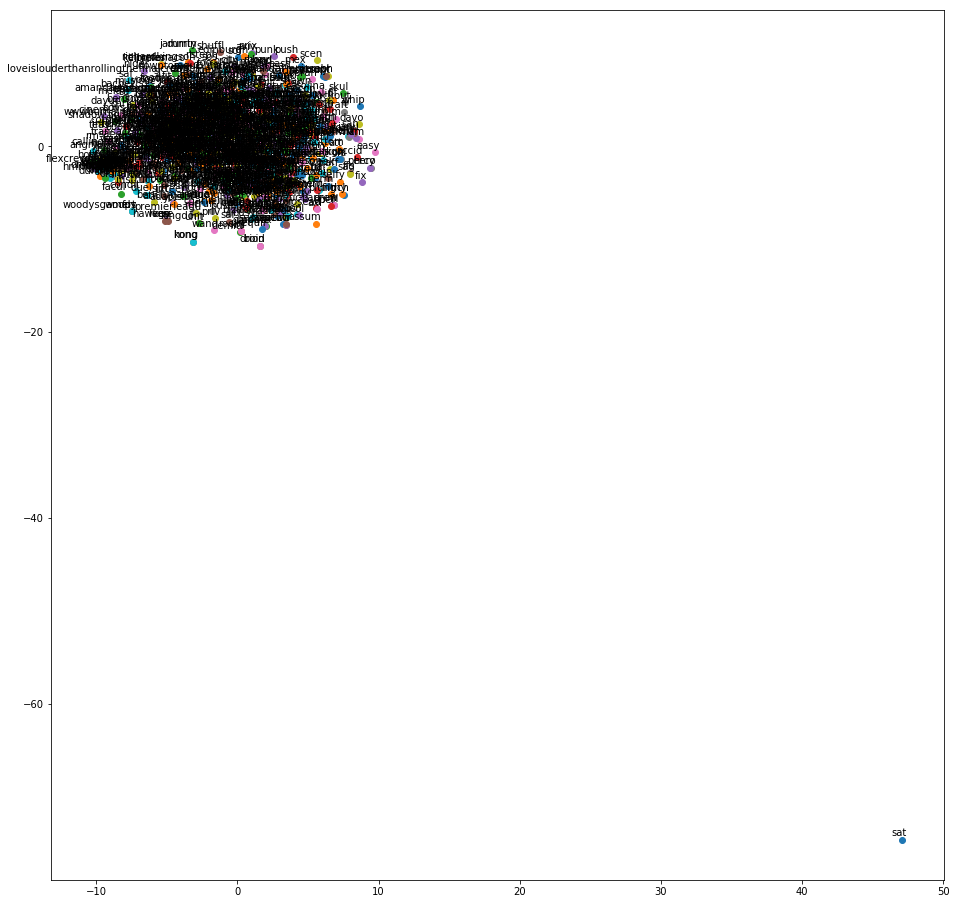

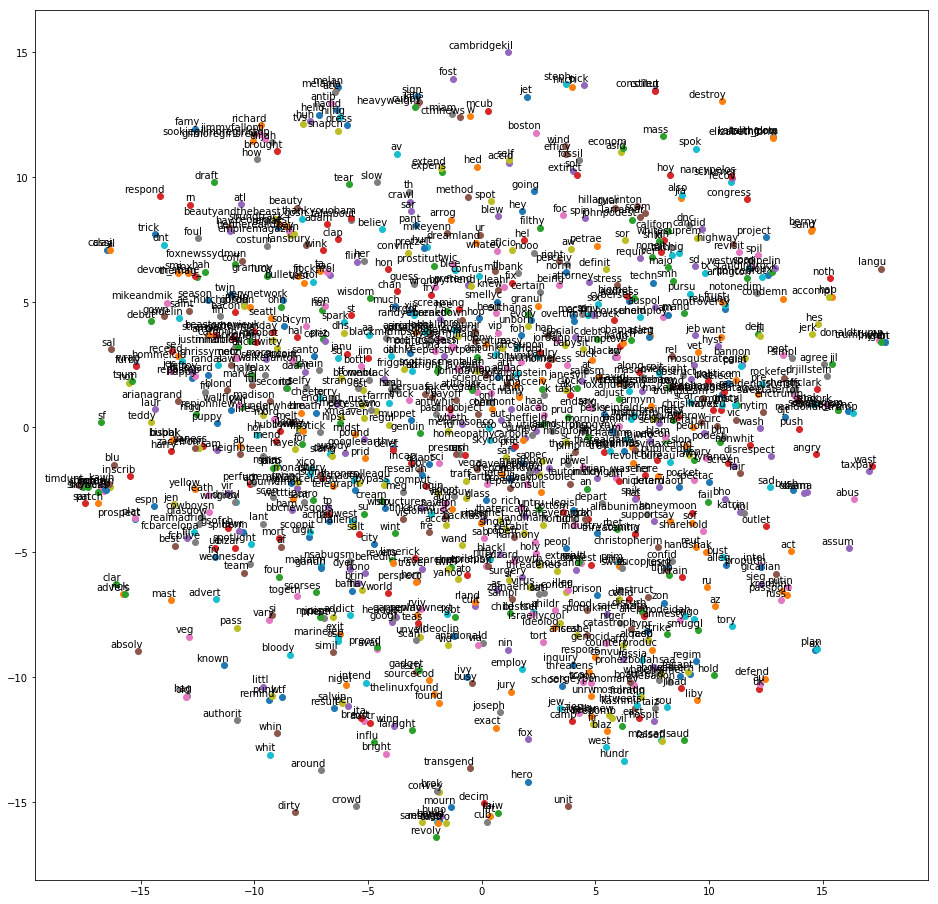

In [59]:
#Word Embeddings Visualization
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    index=0;
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        index += 1;
        if index == 1000: #it's unreadable when the whole set is displayed
          break;
        
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    
    for value in new_values:
      x.append(value[0])
      y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
      plt.scatter(x[i],y[i])
      plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
           textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()



tsne_plot(trainModel_w2v)
tsne_plot(testModel_w2v)


Save the trained models

In [0]:
#save the trained model as .pickle
import pickle

filename = 'trainModelW2v.pkl'
pickle.dump(trainModel_w2v, open(filename, 'wb')) #WHERE IS IT STORED??

filename = 'testModelW2v.pkl'
pickle.dump(testModel_w2v, open(filename, 'wb')) #WHERE IS IT STORED??

And load them

In [0]:
#load the trained model, to avoid training it each time, also import libraries and files again to not have to run previous code segments


trainModel_w2v = Word2Vec.load("trainModelW2v.pkl")
testModel_w2v = Word2Vec.load("testModelW2v.pkl")



# Creation of Tweet Vectors

for the train set tweets



In [36]:
#FOR TRAIN SET

#create a vector for each tweet, based on the word2vec model, by taking the mean value of all the tokens for each tweet
#I'll put 0 for vectors whose tokens are missing from a tweet, so I just have to take the mean value of each token's tweets to form this tweet's vector

#meanValue is (x1 + x2 + ... + xn)/n where n is the number of all tokens no matter the tweet

#create new dataframe
tweetVectors = pd.DataFrame(columns=['tweet', 'vector'])

#array with the mean vectors
meanVectorsArray = [];

    
#for each tweet's list of tokens
for tokenList in tokenizedTweets:
  tokenSum = [0]*features; #create two temp vectors of zeros
  meanVector = [0]*features;
  tokenCounter = 0; #this will count the tokens of each tweet to help in getting the vectors' mean value
  #for each token in this tweet's token list
  for token in tokenList:
    tokenCounter += 1;
    #sum the tokens' vectors, if the token exists in the model's vocabulary, else it's 0 for the missing vectors
    if token in trainModel_w2v.wv.vocab:
      tokenVector = trainModel_w2v[token]
      for x in range(features):
        tokenSum[x] += tokenVector[x];
        
  #find the mean value of the tweet's vectors, and insert it to the array that holds them
  for x in range(features):
    if(tokenCounter > 0): #in case a tokenList is empty, which makes the tokenCounter=0 (can't divide by zero) meaning no tokens were kept from this tweet
      meanVector[x] = tokenSum[x] / float(tokenCounter);
  meanVectorsArray.append(meanVector);

#insert the meanVector list in the tweetVectors dataframe
tweetVectors['vector'] = meanVectorsArray;

#insert the tweets list to the dataframe with their equivalent vectors
tweetVectors['tweet'] = TWEETS;


print(tweetVectors.head())









/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


                                               tweet  \
0  gas by my house hit  im going to chapel hill o...   
1  theo walcott is still shit watch rafa and john...   
2  its not that im a gsp fan i just hate nick dia...   
3  iranian general says israels iron dome cant de...   
4  tehran mon amour obama tried to establish ties...   

                                              vector  
0  [0.0189525680616498, 0.1319436925696209, 0.201...  
1  [-0.001764552460776435, 0.028807955742296245, ...  
2  [0.018500423783229455, 0.11597008154624039, -0...  
3  [0.0034112706780433655, 0.13276547081768514, 0...  
4  [-0.13634978840127587, 0.042441452853381634, 0...  


and for the test set tweets

In [37]:
#FOR TEST SET

#create a vector for each tweet, based on the word2vec model, by taking the mean value of all the tokens for each tweet
#I'll put 0 for vectors whose tokens are missing from a tweet, so I just have to take the mean value of each token's tweets to form this tweet's vector

#meanValue is (x1 + x2 + ... + xn)/n where n is the number of all tokens no matter the tweet

#create new dataframe
testTweetVectors = pd.DataFrame(columns=['tweet', 'vector'])

#array with the mean vectors
testMeanVectorsArray = [];

    
#for each tweet's list of tokens
for tokenList in testTokenizedTweets:
  tokenSum = [0]*features; #create two temp vectors of zeros
  meanVector = [0]*features;
  tokenCounter = 0; #this will count the tokens of each tweet to help in getting the vectors' mean value
  #for each token in this tweet's token list
  for token in tokenList:
    tokenCounter += 1;
    #sum the tokens' vectors, if the token exists in the model's vocabulary, else it's 0 for the missing vectors
    if token in testModel_w2v.wv.vocab:
      tokenVector = testModel_w2v[token]
      for x in range(features):
        tokenSum[x] += tokenVector[x];
        
  #find the mean value of the tweet's vectors, and insert it to the array that holds them
  for x in range(features):
    if(tokenCounter > 0): #in case a tokenList is empty, which makes the tokenCounter=0 (can't divide by zero) meaning no tokens were kept from this tweet
      meanVector[x] = tokenSum[x] / float(tokenCounter);
  testMeanVectorsArray.append(meanVector);

#insert the meanVector list in the tweetVectors dataframe
testTweetVectors['vector'] = testMeanVectorsArray;

#insert the tweets list to the dataframe with their equivalent vectors
testTweetVectors['tweet'] = testTWEETS;


print(testTweetVectors.head())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


                                               tweet  \
0  arianagrande ari by ariana grande  full singer...   
1  ariana grande kiis fm yours truly cd listening...   
2  ariana grande white house easter egg roll in w...   
3  cd musics ariana grande sweet like candy  oz  ...   
4  side to side   arianagrande sidetoside arianag...   

                                              vector  
0  [0.13727354551000254, -0.04324948747775385, -0...  
1  [0.04390727989375591, -0.11302200509235263, -0...  
2  [0.04969264235761431, -0.05075050238519907, 0....  
3  [0.05783002092861212, 0.0683410470553029, -0.1...  
4  [0.1398864140113195, 0.013496636206077205, -0....  


In [0]:
#read lexica

affinFile= 'https://raw.githubusercontent.com/al3xlapo/dataMining/master/lexica/affin/affin.txt'
valenceLexiconFile = 'https://raw.githubusercontent.com/al3xlapo/dataMining/master/lexica/emotweet/valence_tweet.txt'
genericFile = 'https://raw.githubusercontent.com/al3xlapo/dataMining/master/lexica/generic/generic.txt'
nrcFile = 'https://raw.githubusercontent.com/al3xlapo/dataMining/master/lexica/nrc/val.txt'
nrctagFile = 'https://raw.githubusercontent.com/al3xlapo/dataMining/master/lexica/nrctag/val.txt'

affin = pd.read_csv(affinFile, delimiter='\t',names = ["Word", "Value"])
valence = pd.read_csv(valenceLexiconFile, delimiter='\t',names = ["Word", "Value"])
generic = pd.read_csv(genericFile, delimiter='\t',names = ["Word", "Value"])
nrc = pd.read_csv(nrcFile, delimiter='\t', quoting=csv.QUOTE_NONE, names = ["Word", "Value"])
nrctag = pd.read_csv(nrctagFile, delimiter='\t',names = ["Word", "Value"])



# Classification

> # KNN





In [0]:
#KNN classification - word2vec

tweets_x = tweetVectors['vector'].tolist();
tweets_y = train_data['Sentiment'].tolist();

test_x = testTweetVectors['vector'].tolist();


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(tweets_x, tweets_y)

y_pred = knn.predict(test_x)

In [0]:
#KNN classification - bag of words

tweets_x = trainBow;
tweets_y = train_data['Sentiment'].tolist();

test_x = testBow

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(tweets_x, tweets_y)

y_pred = knn.predict(test_x)

In [0]:
#KNN classification - tf-idf

tweets_x = trainTfidf
tweets_y = train_data['Sentiment'].tolist();

test_x = testTfidf;

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(tweets_x, tweets_y)

y_pred = knn.predict(test_x)


> #  SVM







In [0]:
#SVM classification - word2vec

tweets_x = tweetVectors['vector'].tolist();
tweets_y = train_data['Sentiment'].tolist();

test_x = testTweetVectors['vector'].tolist();


from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True)

svc = svc.fit(tweets_x, tweets_y)

svc = svc.fit(tweets_x, tweets_y)

ySVM_pred = svc.predict(test_x)


In [0]:
#SVM classification - tf-idf

tweets_x = trainTfidf
tweets_y = train_data['Sentiment'].tolist();

test_x = testTfidf;


from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True)

svc = svc.fit(tweets_x, tweets_y)

svc = svc.fit(tweets_x, tweets_y)

ySVM_pred = svc.predict(test_x)

In [0]:
#SVM classification - bag of words

tweets_x = trainBow;
tweets_y = train_data['Sentiment'].tolist();

test_x = testBow

from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True)

svc = svc.fit(tweets_x, tweets_y)

ySVM_pred = svc.predict(test_x)

# Evaluation

In [63]:
#evaluation

#evaluation set
evalSentiment = evalDataset['Sentiment'].tolist();


#evaluate SVM
print(f1_score(evalSentiment, ySVM_pred, average='macro'))


#evaluate KNN
from sklearn import metrics
print(metrics.accuracy_score(evalSentiment, y_pred))

0.33135016086713065
0.4303158580267014



MODEL|Bag of Words | TF-IDF | Word2Vec
:---:|:---:|:---:|:---:|
KNN|0,39|0,41|0,45
SVM|0,32|0,33|0,39


Γενικά το classification με KNN δεν έδειξε βελτίωση στα αποτελέσματα όταν δοκιμάστηκε μεγαλύτερος αριθμός γειτόνων, πχ για 5 neighbors τα αποτελέσματα κινούνταν στο ίδιο επίπεδο με την εκτέλεση του αλγορίθμου για 1 neighbor.

Τα αποτελέσματα του KNN ήταν λίγο καλύτερα απ' αυτα που έδωσε το SVM, και πραγματοποίησε το classification σε πολύ συντομότερο χρόνο.



Και στο KNN και στο SVM το accuracy είναι χαμηλό και πλησιάζει την τυχαιότητα (0,33 είναι η πιθανότητα ένα tweet να έχει τη σωστή τιμή sentiment, μιας και το πλήθος των επιλογών είναι 3, positive, neutral και negative).  Επαληθεύεται ωστόσο και στις δυο περιπτώσεις ότι ο TF-IDF αλγόριθμος γενικά είναι αποτελεσματικότερος απ' τα bag of words, και τα word embeddings πιο αποδοτικά και απ'τα δύο. Το word2vec βέβαια θεωρητικά θα 'πρεπε να είναι αρκετά πιο ακριβές αλλά πιθανώς τα χαμηλά του νούμερα να οφείλονται σε κάποιο σφάλμα στη δημιουργία των vectors για ολόκληρο το tweet κατά τον υπολογισμό της μέσης τιμής των tokens του. To πρόβλημα με τα embeddings ήταν ότι χρειάστηκε σημαντικά περισσότερος χρόνος για να γίνει το classification σε σχέση με τον χρόνο που χρειάστηκαν τα bag of words και το TF-IDF.


